In [2]:
#Tables and matrices
import numpy as np
import pandas as pd

#Stats
import scipy.stats as st
from scipy.optimize import fmin
from scipy import integrate
from scipy.stats.mstats import mquantiles


#Probabilistic programs
#!pip install numpy mkl #if you are in an intel machine i.e. in mac M# chips no
#!pip install pymc
#!pip install pytensor
import pymc as pm
import pytensor.tensor as pt
#import aesara.tensor as at
print('Running on PyMC v{}'.format(pm.__version__))


#Graphs 
#IMPORTANT: properly install ipywidgets and nodejs for interactive graphs
#If you are in jupyterlab, activate the widget extension (it should be in the latest versions)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib import animation, rc
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Layout
from mpl_toolkits.mplot3d import axes3d
import arviz as az

Running on PyMC v5.16.1


# Posteriors, priors, & likelihoods


 
| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| <img src="1_CB/Bayes1.png" width = "300" height = '300'> |  |  <img src="1_CB/Bayes2.jpg" width = "300" height = '300'>  |  




| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| <img src="1_CB/Bayes3.jpg" width = "300" height = '300'> |  |  <img src="1_CB/Bayes4.png" width = "300" height = '300'>  |  


| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| <img src="1_CB/EV_vs_GAS.jpg" width = "300" height = '300'> |  |  <img src="1_CB/Lithium_Needs.png" width = "500" height = '500'>  |  


| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| <img src="1_CB/SBF.webp" width = "400" height = '400'> |  |  <img src="1_CB/SBF_2.png" width = "500" height = '500'>  |  


| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| <img src="1_CB/AGI.jpg" width = "300" height = '300'> |  |  <img src="1_CB/vanRooij.png" width = "400" height = '400'>  |  


| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| This X market segment will grow |  |  Sales from that segment grew  |  



Bayes found how to combine priors y likelihoods


$$ Posterior = \frac{Prior \times Likelihood}{Marginal} $$

Same formula, different "names"

$$ Belief_{t+1} = \frac{Belief_t \times Likelihood}{Marginal} $$

Same formula expanded


$$ p(Hypothesis|Data) = \frac{p(Hypothesis) \times p(Data|Hypothesis)}{p(Data)} $$

# Theorem's proof

<center><img src="1_CB/Bayes6.svg" width = "600" height = '600'></center> 


<center><img src="1_CB/Bayes7.svg" width = "600" height = '600'></center> 


<center><img src="1_CB/Bayes8.svg" width = "600" height = '600'></center> 


# Visualization of posteriors, priors, y likelihoods

## Hipotheses space (events)
<center><img src="1_CB/Bayes9.svg" width = "400" height = '400'></center> 


## Hipotheses space (events)
<center><img src="1_CB/Bayes10.svg" width = "400" height = '400'></center> 


## Priors
<center><img src="1_CB/Bayes11.svg" width = "600" height = '600'></center> 


## Data
### Marginal: overall probability of the data, across all priors (gray divided by the hypotheses space area)


<center><img src="1_CB/Bayes12.svg" width = "550" height = '550'></center> 


## Likelihoods
<center><img src="1_CB/Bayes13.svg" width = "550" height = '550'></center> 


<center><img src="1_CB/Bayes14.svg" width = "550" height = '550'></center> 



<center><img src="1_CB/Bayes15.svg" width = "550" height = '550'></center> 


## Posterior

<center><img src="1_CB/Bayes16.svg" width = "550" height = '550'></center> 


## Posterior vs. likelihood
<center><img src="1_CB/Bayes17.svg" width = "700" height = '700'></center> 

# A simple binary case

Frequentist probability: frequency of events; there is a point estimate

|Problem|Data|$\theta$|
|:-------:|:-------:|:-------:|
|<img src="2_CB/Coin_cara.png" width = "105" height = '105'>|1 head, 6 tails|$\frac{1}{7}$|

Bayesian probability: beliefs; there is a distribution over the potential estimate

|Problem|Data|$\theta$|
|:-------:|:-------:|:-------:|
|<img src="2_CB/Coin_cara.png" width = "105" height = '105'>|1 head, 6 tails|<img src="2_CB/beta.svg" width = "200" height = '200'>|


Bayes lure: 

We can combine prior knowledge about an hypothesis ($p(\theta))$ and update that prior with data to obtain a new posterior belief/knowledge ($p(\theta|data)$).

$$ p(\theta|data) = \frac{p(data|\theta)p(\theta)}{p(data)}$$

Today's posterior is the future prior

Prior: lands heads 50% of the times. <br>
Data: after 10 throws, only lands heads once <br>
Posterior: lands heads 35% of the times (under some likelihood)

# Where do posteriors come from?

The Bayesian setup requires to define likelihoods and priors to obtain a posterior belief after observing data:
<center><img src="2_CB/bayes_framework.gv.svg" width = "350" height = '350'></center>

The posterior comes from a) analytical solutions or b) computational methods (the majority)

### Let's see a pair of analytical solutions:
1) Beta posterior
2) Normal posterior

### Analytical derivation of a Beta posterior 
###### Likelihood: Bernoulli
###### Prior: Beta
###### Posterior: Beta (we will prove this)


Data: binary and independent (e.g. heads-tails; point-no point; pass-fail; happy-unhappy)

Objective: to estimate the latent probability of one of the binary outcomes

Model: Beta (prior) - Bernoulli (LH)

<center><img src="2_CB/beta_bernoulli.svg" width = "600" height = '600'></center>

Prior (our model for beliefs) & likelihood (our model for the data):

$$posterior \propto Beta \times Bernoulli$$


Let's plug in the formulas

$$P(\theta|successes,tries,\alpha,\beta,p) \propto \frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha,\beta)} \times p^{successes}(1-p)^{tries-successes}$$

pars = $\alpha,\beta,p$ <br>
N = tries<br>
z = successes

After some algebra we realize that multiplying a Beta and a Bernoulli function results in:

$$ p(\theta|z,N,\alpha,\beta) \sim beta(z+\alpha, N-z+\beta) $$ 

The posterior includes data (N,z) and previous beliefs ($\alpha$, $\beta$).

We started with a beta for the prior and a Bernoulli for the likelihood. We ended with a posterior beta, thus the prior was a conjugate (https://en.wikipedia.org/wiki/Conjugate_prior).


In [3]:
# Interactive plot. Belief update after data
theta_real = 0.375 #heads probability (this is the one we want to infer; in the real world we do not know it)
def posterior_beta(lanzamientos, a, b):
    #Likelihood: observed heads follow a Bernoulli
    #Prior: Beta with parameters a, b 
    
    #Experiment (data)
    np.random.seed(seed=1144)
    caras = st.bernoulli.rvs(theta_real, size=lanzamientos).sum() #heads
    
    #Prior (belief)
    prior_par = np.array([a,b]) 
    
    #Posterior (updated belief)
    #Obtained analytically
    nsims = 10000
    a = caras + prior_par[0]
    b = lanzamientos - caras + prior_par[1]
    posterior_samples = np.sort(st.beta.rvs(a = a, b = b, size = nsims)) 
    posterior_pdf = st.beta.pdf(x = posterior_samples, a = a, b = b)
    
    #Graph
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    idx1 = np.where(posterior_samples>=np.percentile(posterior_samples,q=2.5))[0][0]
    idx2 = np.where(posterior_samples>=np.percentile(posterior_samples,q=97.5))[0][0]
    text = "[" + str(np.round(posterior_samples[idx1],3)) +\
    "," + str(np.round(a/(a+b),3)) +\
    "," + str(np.round(posterior_samples[idx2],3)) + "]"
    ax.plot(posterior_samples, posterior_pdf,'r-', lw=5, alpha=0.8, 
            label = '[2.5%, mean, 97.5%]  = ' + text)
    ax.set_title('Posterior (belief of heads) \n Real prob.: ' + str(theta_real))
    ax.set_xlabel('Heads probability')
    ax.set_ylabel('Density')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1.2*np.max(posterior_pdf)])
    ax.legend(loc = 'upper right')
    

In [4]:
w_experimento = widgets.BoundedIntText(value = 3, description = 'Throws: ',
                                      min = 1, max = 1000000)
w_prior_par_a = widgets.BoundedIntText(value = 1, description = 'Prior par a: ',
                        min = 1, max = 1000000)
w_prior_par_b = widgets.BoundedIntText(value = 1, description = 'Prior par b: ',
                        min = 1, max = 1000000)
out = widgets.interactive_output(posterior_beta, 
                                 {'lanzamientos': w_experimento, 
                                  'a': w_prior_par_a, 'b': w_prior_par_b})
left_widgets = VBox([w_experimento])
right_widgets = VBox([w_prior_par_a, w_prior_par_b])
top = HBox([left_widgets, right_widgets])
VBox([top, out])


Example 2; based on Kahneman, 2011, Thinking, Fast, and Slow.

Objective: guess the profession.

Charles is shy, kind, but with little interest in socializing. He likes order and is precise in his work.

¿Electrical Engineer or Business major?


Kahneman found that the majority would say electrical engineer. <br>
Why? <br>
Judgment guided by the likelihood that Charles' observables are more likely in an engineer? <br>
Do we neglect the prior that more people study Business?

In [5]:
#Example: electrical engineer or business major.
#Based on: Davidson-Pilon (2015).
def posterior_beta_carlos(a_prior, b_prior, data_experimento):
    #Bayes
    prior_par = np.array([a_prior,b_prior])
    prior_mean = [a_prior/(a_prior+b_prior), 1 - a_prior/(a_prior+b_prior)]
    nsims = 10000
    juicio_ing = data_experimento[0] #people that said engineer
    juicio_todos = data_experimento.sum() #whole sample
    a =  juicio_ing + prior_par[0] #we will see later in the course why a, b take this form (bernoulli-beta model)
    b = juicio_todos - juicio_ing + prior_par[1]
    posterior_mean = [a/(a+b), 1 - a/(a+b)] #With uniform prior
    
    a =  juicio_ing + prior_real[0]
    b = juicio_todos - juicio_ing + prior_real[1]
    posterior_real_mean = [a/(a+b), 1 - a/(a+b)] #With a data-based prior
    
    #Graph
    #With uniform prior
    #fig, ax = plt.subplots(1,2, figsize=(12, 3))
    fig, ax = plt.subplots(1,1, figsize=(12, 3))
    colors = ["#348ABD", "#A60628"]
    fig.suptitle('Prior and posteriors of professions')
    ax.bar([0, .7], prior_real, alpha=0.70, width=0.25, color=colors[0], label="Prior (data-based)",
            lw=3, edgecolor="#348ABD")
    ax.bar([0+0.25, .7+0.25], posterior_mean, alpha=0.7,
            width=0.25, color=colors[1], label="Posterior with uniform prior",
            lw=3, edgecolor="#A60628")
    ax.set_xticks([0.20, 0.95])
    ax.set_xticklabels(["Engineer", "Business"])
    #ax[0].set_title("Prior real y posterior de las profesiones de Carlos")
    ax.set_ylabel("Probability")
    ax.set_ylim([0,1.1])
    ax.legend(loc="upper right");


Data experiment: 
Electrical: 133798
Business: 44600


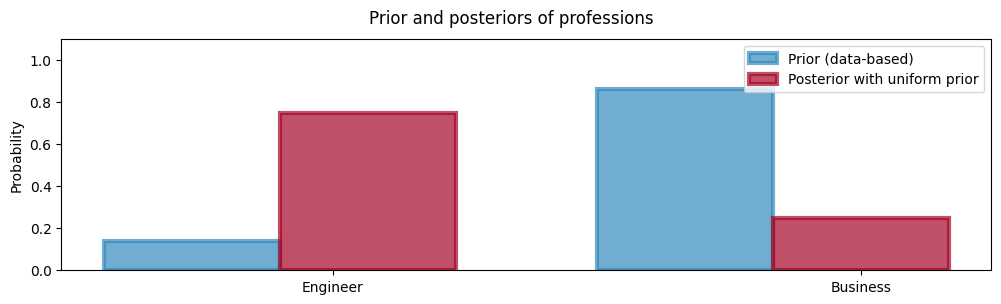

In [6]:
#Real data: Colombia, data min. educacion 2001-2018.
grad = np.array([24763, 153635]) #number of degrees [electrical, business]
prior_real = [grad[0]/grad.sum(), grad[1]/grad.sum()] 

#Experiment. We ask a lot of people and found the following number of
#people saying that Charles is: [electrical engineer, business major]
data_experimento = np.array([round(grad.sum()*3/4), round(grad.sum()*1/4)]) 
print('Data experiment: \nElectrical: ' + str(data_experimento[0]) + "\nBusiness: "  + str(data_experimento[1]))

#The real prior (blue), looks different from the observed beliefs (posterior, red)
#The posterior is robust to different priors. People are biased. 
#They use the likelihood: the probability of Carlos personality, given the hypothesis that
#he is an engineer 
posterior_beta_carlos(1, 1, data_experimento) 

What hypotheses or latent $\theta$ are interesting in finance, insurance, real sector, artificial intelligence, your industry?

For instance, [minute 16](https://www.youtube.com/watch?v=RY-M0tvN77s) or [minute 1](https://www.youtube.com/watch?v=twpZhNqVExc)

* Consumer acquisition costs
* Consumer life value
* Leadership
* Consume Preferences
* Product placement
* Innovation capacities
* Entrepreneurship
* Subjective utility
* Risk aversion
* Impulsivity (e.g. intertemporal discounting)
* Trust
* Selfishness 
* Altruism
* Empathy
* Psychopathy
* Perceptual sensitivity
* Math ability
* Capacity (in bits) of a learner
* Pragmatic interpretation of a sentence
* Object identity in the visual field
* Creativity
* Uncertainty
* Others



# Analytical derivation of a normal posterior 
### Likelihood: Normal
### Prior: Normal

Likelihood (normal)
$$ p(y|\theta) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}(y-\theta)^2}$$

Prior (normal)
$$ p(\theta) = \frac{1}{\sqrt{2\pi}\tau_0}e^{-\frac{1}{2\tau_0^2}(\theta-\mu_0)^2}$$


The Bayesian setup requires likelihoods and priors to compute a posterior: 
<center><img src="2_CB/bayes_framework.gv.svg" width = "350" height = '350'></center>

The typical Bayesian setup, without the marginal, is to define likelihoods and priors:

$$posterior \propto prior \times likelihood$$


Prior (our model for beliefs) & likelihood (our model for the data):

$$posterior \propto Normal (\mu_0,\tau_0^2) \times Normal(\theta,\sigma^2)$$


Let's plug in the formulas:

$$P(\theta|y, \sigma,\tau_0,\mu_0) \propto \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}(y-\theta)^2}\times \frac{1}{\sqrt{2\pi}\tau_0}e^{-\frac{1}{2\tau_0^2}(\theta-\mu_0)^2}$$

After some algebra ...

The posterior is $Normal(\mu_1,\sigma_1^2)$

\begin{align}
P(\theta|y, \sigma,\tau_0,\mu_0) &\propto e^{-\frac{1}{\frac{2\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2}}\left(\left(\theta - \frac{(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2}\right)^2\right)}
\end{align}

$\mu_1 = \frac{(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2} = \frac{\tau_0^{-2}\mu_0 + \sigma^{-2} y}{\tau_0^{-2} + \sigma^{-2}}$ 

$\sigma_1 = \frac{\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2} = \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\tau_0^2}}$

Note: the 2nd equal in $\mu_1$ y $\sigma_1$ is obtained by dividing the numerator and denominator by $\frac{1}{\sigma^2\tau_0^2}$

Looks nasty but let's analyze the result:

$\mu_1 = \frac{\tau_0^{-2}\mu_0 + \sigma^{-2} y}{\tau_0^{-2} + \sigma^{-2}}$ 

$\sigma_1^2 = \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\tau_0^2}}$

The mean of the posterior is a compromise between data ($y$) and the prior mean ($\mu_0$). The compromise scales with the variance of the likelihood and the prior.

The posterior variance is always lower than the variance of the likelihood and the prior.

Note: if $y$ has n data points, change $y$ by it's mean and divide $\sigma^2$ by n; the final posterior is similar. 

Important Bayesian lesson (visually):

There is a "tug of war" between prior beliefs and likelihood of the data for the final posterior beliefs.

<center><img src="2_CB/Prior_vs_LH.svg" width = "551" height = '550'></center>

In [6]:
def normal_normal(muestras):
    #Objective: estimate the mean value of a process given some data
    #Model: Normal-Normal
    np.random.seed(seed=1144)
    #muestras = 20
    datos_par = [0,1]#mu, sd
    evidencia = np.sort(st.norm.rvs(size = muestras, #muestras is samples in english
                                    loc = datos_par[0], 
                                    scale = datos_par[1])) #normal data (evidence)
    prior_par = [-10, 1] #mu, sd
    likelihood_par = [3] #sd
    hipotesis = np.linspace(-20,20,200) #hypotheses space
    likelihood = []
    for i in range(len(hipotesis)):
        lh = np.sum(st.norm.pdf(evidencia,
                                loc = hipotesis[i],
                                scale = likelihood_par[0]))
        likelihood.append(lh) #Likelihood without normalizing constant
    prior = st.norm.pdf(hipotesis,
                        loc = prior_par[0],
                        scale = prior_par[1])
    A = prior_par[0]/(prior_par[1]**2)
    B = evidencia.mean()/(likelihood_par[0]**2/muestras)                  
    C = 1/(prior_par[1]**2)
    D = 1/(likelihood_par[0]**2/muestras)
    post_par = [round((A + B)/(C + D),2),
               round(np.sqrt(1/(C+D)),2)]
    posterior = st.norm.pdf(hipotesis,
                        loc = post_par[0],
                        scale = post_par[1])

    fig, ax = plt.subplots(1,1,figsize = (10,5))
    #Prior
    y = prior/np.max(prior)
    idx = y>0.001
    ax.plot(hipotesis[idx], y[idx], 'r-', lw=2, alpha=0.6, 
            label='Prior normal('+ str(prior_par[0]) + ','+ str(prior_par[1]) +')')
    #Likelihood
    y = likelihood/np.max(likelihood)
    idx = y>0.001
    ax.plot(hipotesis[idx], y[idx], 'b-', lw=2, alpha=0.6, 
            label='Likelihood normal('+ 'hipotheses' + ','+ str(likelihood_par[0]) +')')
    #Posterior
    y = posterior/np.max(posterior)
    idx = y>0.00001
    ax.plot(hipotesis[idx], y[idx], 'g-', lw=2, alpha=0.6, 
            label='Posterior normal('+ str(post_par[0]) + ','+ str(post_par[1]) +')')
    #Realidad
    ax.plot(np.repeat(datos_par[0],100),
           np.linspace(0,1,100),'k--',lw=2,
           label = 'Real')
    ax.legend()
    ax.set_xlim([np.min(hipotesis), np.max(hipotesis)])
    ax.set_xlabel('Hipotheses')
    ax.set_ylabel('Probability \n (density standardized to the max)');
    #fig.savefig('img/2_CB/norm_norm.svg')

wN = widgets.IntSlider(value=10, min = 1, max = 100,
                       description='N data: ')

out = widgets.interactive_output(normal_normal, 
                                 {'muestras': wN})

VBox([wN, out])

# Some definitions and corollaries from probability theory

Definitions
* Conditional probability: $p(u|v)$
* Marginal probability: $p(u) = \int p(u,v) dv$
* Joint probability: $p(u,v) = p(u|v)p(v)$
* Posterior predictive distribution (de $\tilde{obs}$): $p(\tilde{obs}|obs) = \int p(\tilde{obs}|\theta)p(\theta|obs)d\theta$
* Expected value $E(u)$: $\int up(u)du$
* Variance $var(u)$: $\int (u - E(u))(u - E(u))^Tp(u)du$

Corollary 
* Chain rule. Example with 3 variables: $p(u,v,w) = p(u|v,w)p(v,w) = p(u|v,w)p(v|w)p(w)$ 

# Bayesian A/B testing

## A/B Testing

This is perhaps the simplest and most popular experimental design. We want to determine which option is better, A or B. 

For instance, which robot should interact with clients in an airport? Robot A or Robot B?

|<img src="4_CB/Robot_A.webp" width = "300" height = '300'>|<img src="4_CB/Robot_B.jpg" width = "250" height = '250'>|
|:-:|:-:|
|||

We set up an experiment. Two groups in different airports. The size of each group is $n_1$ and $n_2$ with $k_1$ y $k_2$ counts preferring robot 1. With these data, we want to determine the latent/real proportion $\theta_1$ (%preferring robot 1) and $\theta_2$ (%preferring robot 2).

Bayesian formulation:
<center><img src="4_CB/model_ab.svg" width = "600" height = '600'></center>

In [7]:
#We do not know these proportions. They are the theta in the previous graphical model (DAG).
true_p_A = 0.09 
true_p_B = 0.04

#We have more data at site A. This is not a problem, the Bayesian setup handles it well.
N_A = 150
N_B = 75

#We generate some data. The ks in the graphical model.
datos_A = st.bernoulli.rvs(true_p_A, size=N_A)
datos_B = st.bernoulli.rvs(true_p_B, size=N_B)
print("Obs from site A: ", datos_A[:30], "...")
print("Obs from site B: ", datos_B[:30], "...")
print("Mean A: ", np.mean(datos_A))
print("Mean B: ", np.mean(datos_B)) 

Obs from site A:  [0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0] ...
Obs from site B:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Mean A:  0.10666666666666667
Mean B:  0.02666666666666667


In [8]:
# Let's formulate the model in pymc. 
# We will use uniform priors for p_A & p_B (the thetas)
with pm.Model() as model:
    
    #Priors
    p_A = pm.Beta("p_A", 1, 1) #Beta(1,1) uniform in the range 0,1
    p_B = pm.Beta("p_B", 1, 1)
    
    #Key variable: the difference in proportions.
    delta = pm.Deterministic("delta", p_A - p_B)

    # Likelihood. We assume both sampling sites are independent.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=datos_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=datos_B)

    # Sampling algorithm
    #step = pm.Metropolis() #Algorithm type.
    nsamples = 3000
    #trace = pm.sample(nsamples, step=step)
    trace = pm.sample(nsamples, chains = 4) #, target_accept = 0.8)
    
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_A, p_B]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 59 seconds.


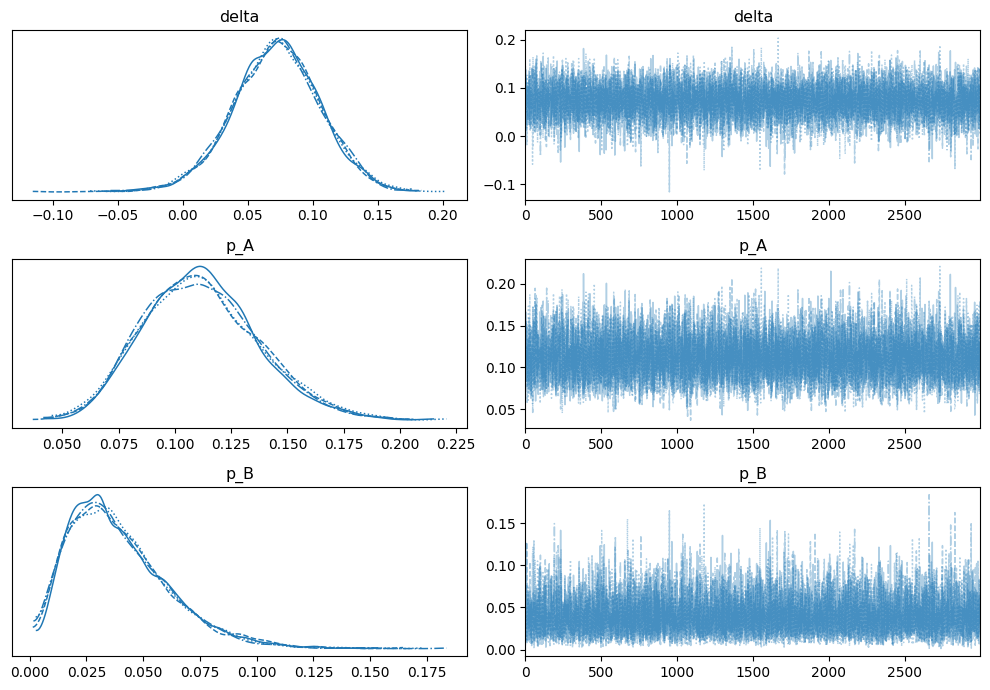

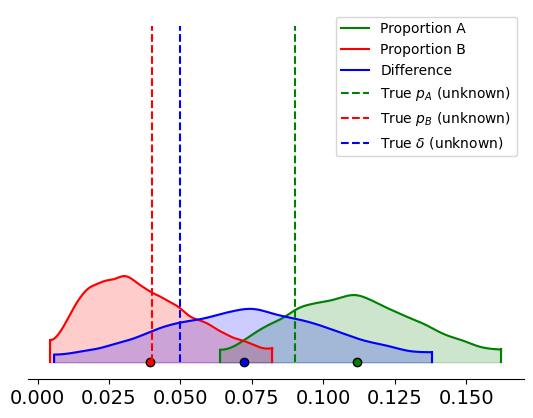

In [9]:
#Graph
s = az.extract(trace) #puts the info of the n chains together
p_A_samples = np.array(s["p_A"]) 
p_B_samples = np.array(s["p_B"])
delta_samples = np.array(s["delta"])  

#Convergence
az.plot_trace(trace, figsize = [10,7]);
plt.tight_layout()

#Densities 
az.plot_density(
    [p_A_samples,p_B_samples,delta_samples],
    data_labels = ['Proportion A', 'Proportion B', 'Difference'],
    shade=.2, colors = ['green','red','blue'] ,hdi_prob=.95, 
)
plt.vlines(true_p_A, 0, 80, linestyle="--", 
           label="True $p_A$ (unknown)", color ='green')
plt.vlines(true_p_B, 0, 80, linestyle="--", 
           label="True $p_B$ (unknown)", color ='red')
plt.vlines(true_p_A-true_p_B, 0, 80, linestyle="--", 
           label="True $\delta$ (unknown)", color ='blue')
plt.legend()
plt.title('');

Are we less confident for B or A? Why? Sample size? Sample quality?

In [10]:
print("Probability that proportion A < proportion B: %.3f" % \
    np.mean(delta_samples < 0))

print("Probability that proportion A > proportion B: %.3f" % \
    np.mean(delta_samples > 0))

Probability that proportion A < proportion B: 0.018
Probability that proportion A > proportion B: 0.982


Are these probabilities enough to decide? Debate

We just compared two proportions with a Bayesian approach.

The sample size is accounted by default in the analysis: less certainty for $p_B$

We can test questions using the posterior directly e.g. mode, areas under the curve, etc

## Exercise (Bayesian proportion test)

1) Load marketing_AB_reduced.csv and name it AB_marketing
2) Print AB_marketing data types
3) Bayesian proportion test. Estimate the proportion difference of converted in the interventions (ad and psa). Use the code above with the same plots (without the .vlines). You just have to change the data in the likelihoods
4) Did it converge. Interpret the distribution for delta.
5) Change the parameters of the beta priors. If possible justify. Did anything change?


## A/B test compare means
[Source: PyMC. Implemented in PyMC 5: Santiago Alonso](https://www.pymc.io/projects/docs/en/v3.11.4/pymc-examples/examples/case_studies/BEST.html)

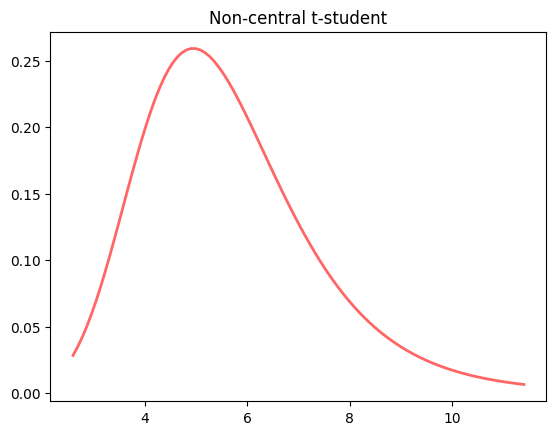

In [11]:
df, nc = 10, 5.24 #degrees of freedom and non-centrality i.e. mu
x = np.linspace(st.nct.ppf(0.01, df, nc), #nct is for non-central t-student distributions
                st.nct.ppf(0.99, df, nc), 100)

plt.plot(x, st.nct.pdf(x, df, nc),
         'r-', lw=2, alpha=0.6, label='nct pdf');
plt.title("Non-central t-student");

This is the probability density function of a non-central t-student distribution:
$$f(x|\mu,\lambda,\nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})} \left(\frac{\lambda}{\pi\nu}\right)^{\frac{1}{2}} \left[1+\frac{\lambda(x-\mu)^2}{\nu}\right]^{-\frac{\nu+1}{2}}$$

Why non-central? Because now we estimate the difference, we do not test the null

We collect data from group A and B. The likelihood of that data we define it as a non-central t-student distribution: 
$$x^{(A)}_i \sim T(\nu, \mu_A, \sigma_1)$$
$$x^{(B)}_i \sim T(\nu, \mu_B, \sigma_2)$$

The prior for both $\mu$ is normal, with mean equal to the pooled mean of the whole sample ($\bar{x}$) and standard deviation two times the pooled standard deviation of the whole sample ($2s$)
$$\mu_k \sim N(\bar{x}, 2s)$$

We are ultimately interested in the difference of the latent means:
$$\delta = \mu_A - \mu_B$$

As for $\nu$, we assume that both groups are similar in their normality (no subscript). We assign it an exponential prior. 

$$f(x \mid \lambda) = \lambda \exp\left\{ -\lambda x \right\}$$

We set $\lambda = 1/30$ so that large $\nu$ become progressively unlikely (as $\nu$ grows the t-student is more normal):
<center><img src="4_CB/Exponential.png" width = "600" height = '600'></center>



As for $\sigma_k$, we want variation within some range, to have values within a sensitive limit

$$\sigma_k \sim Uniform(low,high)$$

## Exercise (Diagram)

Make the diagram for the t-test. Remember, it is a generative model of the data. The parameters generate the data, not the other way around. 

In [12]:
#Let´s do the traditional t_test with the website data
AB_website_test = pd.read_csv("AB_test_group.csv", sep = ";")
AB_website_control = pd.read_csv("AB_control_group.csv", sep = ";")
cols = ["Campaign", "Date", "Cost_Campaign", "n_Impresions", "Reach", 
        "n_Clicks", "n_Searches", "n_Views", "n_Cart", "n_Purchase"]
AB_website_test.columns = cols
AB_website_control.columns = cols
AB_website = pd.concat([AB_website_test, AB_website_control]).reset_index(drop=True)
AB_website.dropna(inplace = True)
campaigns = AB_website.loc[:,"Campaign"].unique()
idx_A = (AB_website.loc[:,"Campaign"] == campaigns[0])
idx_B = (AB_website.loc[:,"Campaign"] == campaigns[1])
Group_A = AB_website.loc[idx_A,"n_Purchase"].reset_index(drop=True)
Group_B = AB_website.loc[idx_B,"n_Purchase"].reset_index(drop=True)
print("Two sample t-test: ", st.ttest_ind(Group_A, Group_B))

Two sample t-test:  TtestResult(statistic=-0.03014479856562245, pvalue=0.9760568756579724, df=57.0)


With the frequentist t-test, there is not much to say, the p value is not significant, both groups are similar on the number of purchases.

In [13]:
#Now the bayesian test
#Stats from the whole sample
μ_m = AB_website["n_Purchase"].mean()
μ_s = 2*AB_website["n_Purchase"].std()


#Prior
σ_low = 50
σ_high = 300

with pm.Model() as model:
    #mu priors
    group1_mean = pm.Normal("group1_mean", mu=μ_m, sigma=μ_s)
    group2_mean = pm.Normal("group2_mean", mu=μ_m, sigma=μ_s)
    
    #sigma priors
    group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)
    #group_std = pm.Uniform("group_std", lower=σ_low, upper=σ_high)
    
    
    #nu prior
    ν = pm.Exponential("ν_minus_one", 1 / 29) + 1 #to make sure is not 0 and at least 1
    #ν = pm.Uniform("ν", lower = 100, upper = 200)
    
    #likelihood
    group1 = pm.StudentT("Group_A", nu=ν, mu=group1_mean, sigma=group1_std, 
                         observed=Group_A)
    group2 = pm.StudentT("Group_B", nu=ν, mu=group2_mean, sigma=group2_std, 
                         observed=Group_B)

    #group1 = pm.StudentT("Group_A", nu=ν, mu=group1_mean, sigma=group_std, 
    #                     observed=Group_A)
    #group2 = pm.StudentT("Group_B", nu=ν, mu=group2_mean, sigma=group_std, 
    #                     observed=Group_B)
    
    #Variables of interest
    diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
    effect_size = pm.Deterministic(
        "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
    )
    #effect_size = pm.Deterministic(
    #    "effect size", diff_of_means / np.sqrt((group_std ** 2 + group_std ** 2) / 2)
    #)

    trace = pm.sample(2000, chains = 4, tune = 1000)
    


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group1_mean, group2_mean, group1_std, group2_std, ν_minus_one]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 66 seconds.


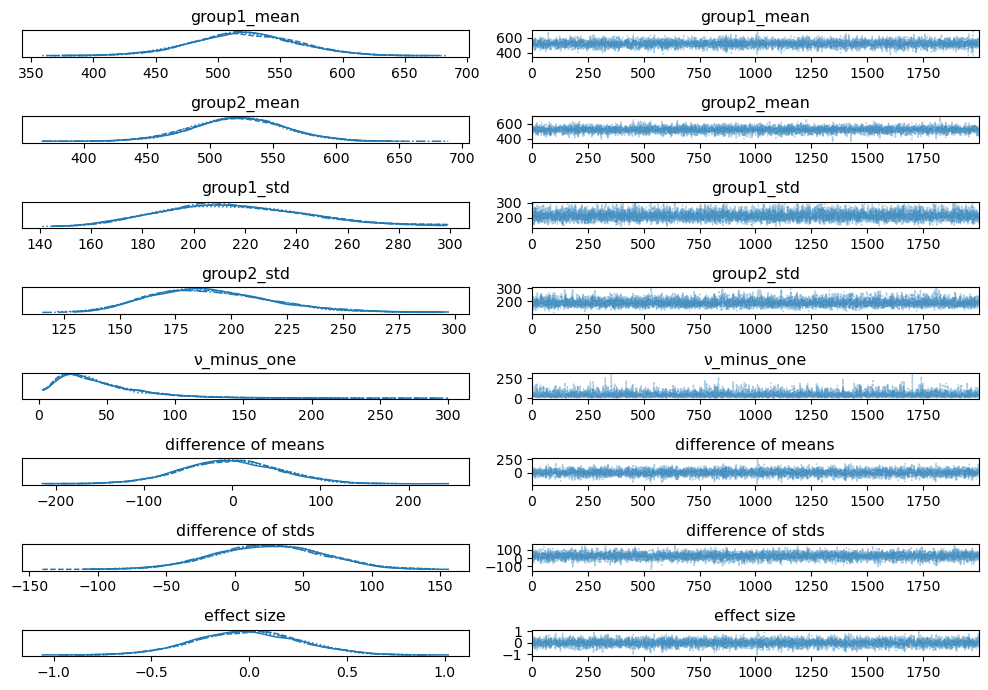

In [14]:
#Convergence
az.plot_trace(trace, figsize = [10,7]);
plt.tight_layout()

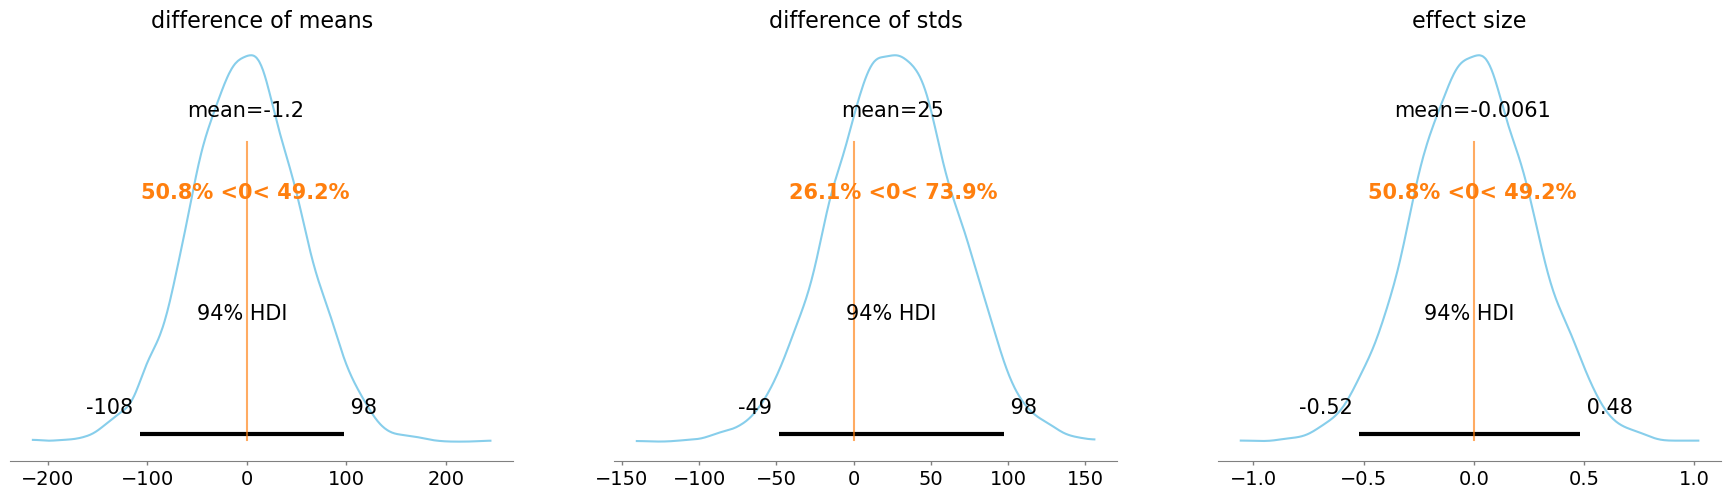

In [15]:
az.plot_posterior(
    trace,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    color="#87ceeb",
);

The Bayesian t test gives a similar answer but with more nuances. 

* The distributions provide us with a direct measure of uncertainty about the difference in means, not only about the null.

* The difference in means favors by a bit the control campaign. If a decision HAS to be made, the posterior prob. advantage is a criteria.

* The test campaign seemed more erratic, the posterior probability indicates a higher probability of a larger standard deviation.

* The difference in effect sizes, which already accounts for standard deviations, also favors slightly the control campaign. Again, this differences in high stress or in limited time could be useful.



## Another binary example: cheating

A researcher is interested in the cheating rate in an university

Solution 1: 
* Ask students if they cheat (direct anonymous method)
    * problem: privacy, distrust on the promise of no punishment and anonimity.


Solution 2: 
* Throw a coin in private. 
    * If heads, write the truth. 
    * If tails, throw again. Write:
        * "yes I cheat" if heads, 
        * "no, I do not cheat" if tails.

It is private. The experimenters do not know the source of the answers because they do not record the coin outcome (it is private). 


What distribution is appropriate for binary data? Binomial

$$P( X = k| p, N) =  {{N}\choose{k}}  p^k(1-p)^{N-k}$$

k: successes <br>
N: tries <br>
p: success probability


Let's model! (tramposos: cheaters; trampa: cheat)

<center><img src="4_CB/model_trampa.svg" width = "750" height = '750'></center>


In [16]:
prob_heads = 0.5
prob_tails = 1-prob_heads
with pm.Model() as model:
    prob_cheat = pm.Uniform("prob_cheat", 0, 1) #Uniform prior 
    prop_cheaters = pm.Deterministic(
        "prop_cheaters", 
        prob_heads*prob_cheat + prob_tails*prob_heads
    )

Now, let's define a likelihood for the binomial data.

In [17]:
# Data
N = 100 #Number of students
cheaters = 35 #Number of students reporting that they cheat (truth+head_second_throw)
with model:
    cheaters_model = pm.Binomial("obs", N, prop_cheaters, 
                                 observed=cheaters)

# Sampling
with model:
    step = pm.Metropolis(vars=[prob_cheat])
    trace = pm.sample(40000, step=step)
    #burned_trace = trace[15000:]

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [prob_cheat]


Sampling 4 chains for 1_000 tune and 40_000 draw iterations (4_000 + 160_000 draws total) took 175 seconds.


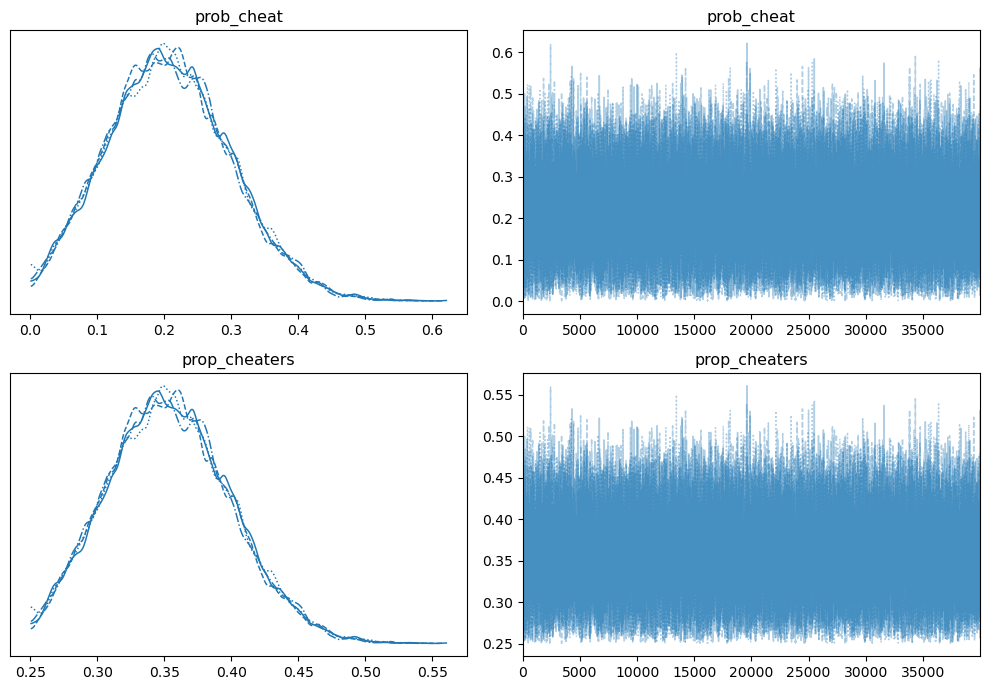

In [18]:
#Convergence
az.plot_trace(trace, figsize = [10,7]);
plt.tight_layout()

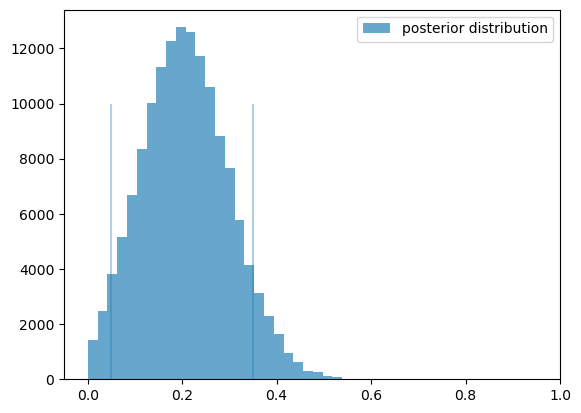

In [19]:
#Note that prob_cheat is less than cheaters/N
bi = 15000 #burn in
p_trace = np.array(trace.posterior.prob_cheat).flatten()[bi:] 
plt.hist(p_trace, histtype="stepfilled", alpha=0.75, bins=30, 
         label="posterior distribution", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [10000, 10000], alpha=0.35)
plt.xlim(-0.05, 1)
plt.legend(); 